### Propuesta #2: Hacer un anime que la gente lo termine para recibir un bono

*Link de los dataset:* https://www.kaggle.com/datasets/azathoth42/myanimelist?select=users_filtered.csv

In [47]:
# General Imports
import pandas as pd
import numpy as np
import seaborn as sns

#### Carga de los archivos csv en memoria y limpieza del dataframe

In [48]:
# Archivo con la informacion de los video juegos
df_anime_list_raw = pd.read_csv('./datasets/anime_filtered.csv')
print(df_anime_list_raw.shape)
print(df_anime_list_raw.dtypes)
df_anime_list_raw.head(10)

(14474, 31)
anime_id            int64
title              object
title_english      object
title_japanese     object
title_synonyms     object
image_url          object
type               object
source             object
episodes            int64
status             object
airing               bool
aired_string       object
aired              object
duration           object
rating             object
score             float64
scored_by           int64
rank              float64
popularity          int64
members             int64
favorites           int64
background         object
premiered          object
broadcast          object
related            object
producer           object
licensor           object
studio             object
genre              object
opening_theme      object
ending_theme       object
dtype: object


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
5,6586,Yume-iro Pâtissière,NaN,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,50,Finished Airing,...,NaN,Fall 2009,Unknown,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Yomiuri Telecasting, DAX Production, Shueisha",NaN,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S..."
6,178,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2003,Tuesdays at 22:00 (JST),"{'Adaptation': [{'mal_id': 956, 'type': 'manga...","WAO World, Studio Jack","Discotek Media, Geneon Entertainment USA",Production Reed,"Magic, Comedy, Romance, School, Shoujo","['""Kagami no Naka"" by can/goo']","['""Hitotsu=Unmei Kyoudoutai"" by can/goo']"
7,2787,Shakugan no Shana II (Second),Shakugan no Shana: Season II,灼眼のシャナII –Second–,Shakugan no Shana 2,https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,24,Finished Airing,...,NaN,Fall 2007,Fridays at 01:25 (JST),"{'Adaptation': [{'mal_id': 3074, 'type': 'mang...","Geneon Universal Entertainment, ASCII Media Works",Funimation,J.C.Staff,"Action, Drama, Fantasy, Romance, School, Super...","['#1: ""JOINT"" by Mami Kawada (eps 1-15)', '#2:...","['#1: ""Triangle"" by Kawada Mami (eps 1-15)', '..."
8,4477,Nodame Cantabile: Paris-hen,NaN,のだめカンタービレ 巴里編,"Nodame Cantabile Paris Chapter, Nodame Cantabi...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,11,Finished Airing

In [49]:
# Eliminando columnas que no son necesarias para este analisis
df_anime_list_reduced = df_anime_list_raw.drop(['title_english','title_japanese','title_synonyms', 'favorites',
                                                'image_url','broadcast','airing','aired_string','aired',
                                                'scored_by','background','type','premiered','related', 'members',
                                                'licensor','opening_theme','ending_theme','studio', 'rank'],axis=1)

print(df_anime_list_reduced.shape)
print(df_anime_list_reduced.dtypes)
df_anime_list_reduced.head(10)

(14474, 11)
anime_id        int64
title          object
source         object
episodes        int64
status         object
duration       object
rating         object
score         float64
popularity      int64
producer       object
genre          object
dtype: object


,anime_id,title,source,episodes,status,duration,rating,score,popularity,producer,genre
0,11013,Inu x Boku SS,Manga,12,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,7.63,231,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,Manga,26,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,7.89,366,"TV Tokyo, AIC, Square Enix, Sotsu","Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,Manga,51,Finished Airing,24 min. per ep.,PG - Children,7.55,1173,"TV Tokyo, Sotsu","Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,Original,38,Finished Airing,16 min. per ep.,PG-13 - Teens 13 or older,8.21,916,"Memory-Tech, GANSIS, Marvelous AQL","Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,Manga,25,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,8.67,426,"NHK, Shueisha","Comedy, Drama, Romance, Shounen"
5,6586,Yume-iro Pâtissière,Manga,50,Finished Airing,24 min. per ep.,G - All Ages,8.03,1630,"Yomiuri Telecasting, DAX Production, Shueisha","Kids, School, Shoujo"
6,178,Ultra Maniac,Manga,26,Finished Airing,24 min. per ep.,G - All Ages,7.26,2490,"WAO World, Studio Jack","Magic, Comedy, Romance, School, Shoujo"
7,2787,Shakugan no Shana II (Second),Light novel,24,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,7.72,332,"Geneon Universal Entertainment, ASCII Media Works","Action, Drama, Fantasy, Romance, School, Super..."
8,4477,Nodame Cantabile: Paris-hen,Manga,11,Finished Airing,23 min. per ep.,PG-13 - Teens 13 or older,8.24,988,"Fuji TV, Asmik Ace Entertainment, Sony Music E...","Music, Slice of Life, Comedy, Romance, Josei"
9,853,Ouran Koukou Host Club,Manga,26,Finished Airing,23 min. per ep.,PG-13 - Teens 13 or older,8.34,69,"VAP, Hakusensha, Nippon Television Network","Comedy, Harem, Romance, School, Shoujo"


In [50]:
# Dejando solo un productor
df_anime_list_reduced['producer'] = df_anime_list_reduced['producer'].astype(str)
df_anime_list_reduced['producer'] = df_anime_list_reduced['producer'].apply(lambda x: x.split(',')[0])

df_anime_list_reduced['genre'] = df_anime_list_reduced['genre'].astype(str)
df_anime_list_reduced['genre'] = df_anime_list_reduced['genre'].apply(lambda x: x.split(',')[0])

print(df_anime_list_reduced.shape)
print(df_anime_list_reduced.dtypes)
df_anime_list_reduced.head(10)

(14474, 11)
anime_id        int64
title          object
source         object
episodes        int64
status         object
duration       object
rating         object
score         float64
popularity      int64
producer       object
genre          object
dtype: object


,anime_id,title,source,episodes,status,duration,rating,score,popularity,producer,genre
0,11013,Inu x Boku SS,Manga,12,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,7.63,231,Aniplex,Comedy
1,2104,Seto no Hanayome,Manga,26,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,7.89,366,TV Tokyo,Comedy
2,5262,Shugo Chara!! Doki,Manga,51,Finished Airing,24 min. per ep.,PG - Children,7.55,1173,TV Tokyo,Comedy
3,721,Princess Tutu,Original,38,Finished Airing,16 min. per ep.,PG-13 - Teens 13 or older,8.21,916,Memory-Tech,Comedy
4,12365,Bakuman. 3rd Season,Manga,25,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,8.67,426,NHK,Comedy
5,6586,Yume-iro Pâtissière,Manga,50,Finished Airing,24 min. per ep.,G - All Ages,8.03,1630,Yomiuri Telecasting,Kids
6,178,Ultra Maniac,Manga,26,Finished Airing,24 min. per ep.,G - All Ages,7.26,2490,WAO World,Magic
7,2787,Shakugan no Shana II (Second),Light novel,24,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,7.72,332,Geneon Universal Entertainment,Action
8,4477,Nodame Cantabile: Paris-hen,Manga,11,Finished Airing,23 min. per ep.,PG-13 - Teens 13 or older,8.24,988,Fuji TV,Music
9,853,Ouran Koukou Host Club,Manga,26,Finished Airing,23 min. per ep.,PG-13 - Teens 13 or older,8.34,69,VAP,Comedy


In [51]:
# Revisando por NaN
nan_counts = df_anime_list_reduced.isna().sum()
print(f"Number of NaN values per column:\n{nan_counts}")

Number of NaN values per column:
anime_id        0
title           0
source          0
episodes        0
status          0
duration        0
rating        542
score           0
popularity      0
producer        0
genre           0
dtype: int64


In [52]:
# Limpiando los NaN
df_anime_list_reduced['rating'] = df_anime_list_reduced['rating'].fillna('Not Specified')

print(df_anime_list_reduced.shape)
print(df_anime_list_reduced.dtypes)
df_anime_list_reduced.head(10)

(14474, 11)
anime_id        int64
title          object
source         object
episodes        int64
status         object
duration       object
rating         object
score         float64
popularity      int64
producer       object
genre          object
dtype: object


,anime_id,title,source,episodes,status,duration,rating,score,popularity,producer,genre
0,11013,Inu x Boku SS,Manga,12,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,7.63,231,Aniplex,Comedy
1,2104,Seto no Hanayome,Manga,26,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,7.89,366,TV Tokyo,Comedy
2,5262,Shugo Chara!! Doki,Manga,51,Finished Airing,24 min. per ep.,PG - Children,7.55,1173,TV Tokyo,Comedy
3,721,Princess Tutu,Original,38,Finished Airing,16 min. per ep.,PG-13 - Teens 13 or older,8.21,916,Memory-Tech,Comedy
4,12365,Bakuman. 3rd Season,Manga,25,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,8.67,426,NHK,Comedy
5,6586,Yume-iro Pâtissière,Manga,50,Finished Airing,24 min. per ep.,G - All Ages,8.03,1630,Yomiuri Telecasting,Kids
6,178,Ultra Maniac,Manga,26,Finished Airing,24 min. per ep.,G - All Ages,7.26,2490,WAO World,Magic
7,2787,Shakugan no Shana II (Second),Light novel,24,Finished Airing,24 min. per ep.,PG-13 - Teens 13 or older,7.72,332,Geneon Universal Entertainment,Action
8,4477,Nodame Cantabile: Paris-hen,Manga,11,Finished Airing,23 min. per ep.,PG-13 - Teens 13 or older,8.24,988,Fuji TV,Music
9,853,Ouran Koukou Host Club,Manga,26,Finished Airing,23 min. per ep.,PG-13 - Teens 13 or older,8.34,69,VAP,Comedy


In [53]:
nan_counts = df_anime_list_reduced.isna().sum()
print(f"Number of NaN values per column:\n{nan_counts}")

Number of NaN values per column:
anime_id      0
title         0
source        0
episodes      0
status        0
duration      0
rating        0
score         0
popularity    0
producer      0
genre         0
dtype: int64


In [54]:
# Contando la cantidad de datos por Developer
count_publisher = df_anime_list_reduced['producer'].nunique()

print(f'Occurrences of each unique value per column:\n{count_publisher}')

Occurrences of each unique value per column:
740


### Analisis estadistico del dataframe

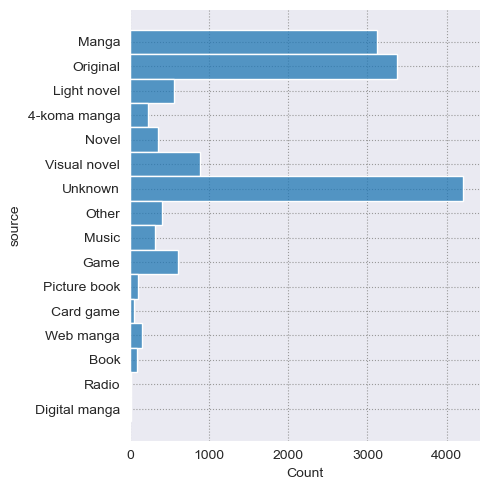

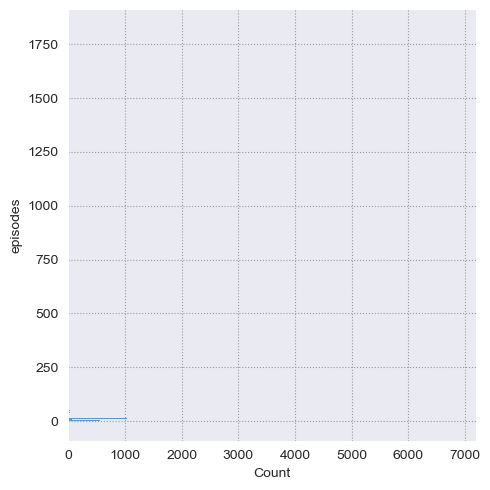

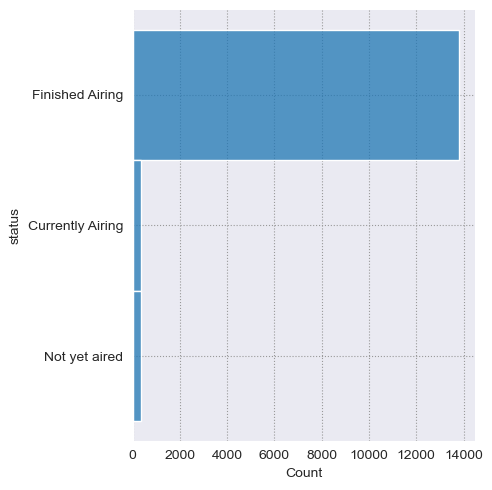

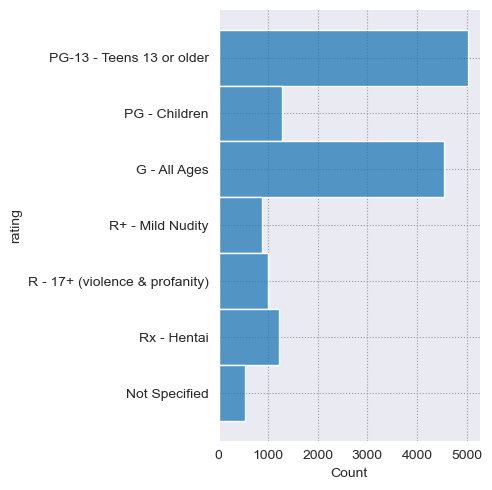

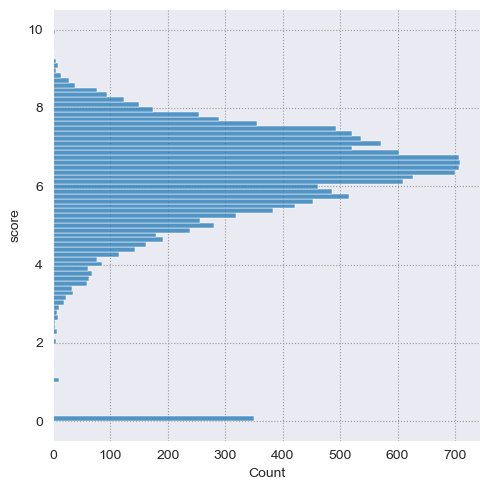

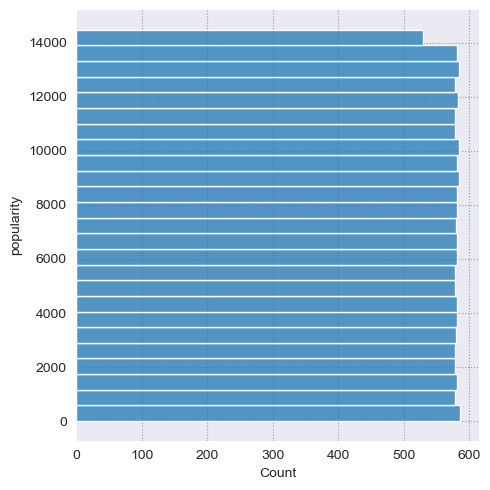

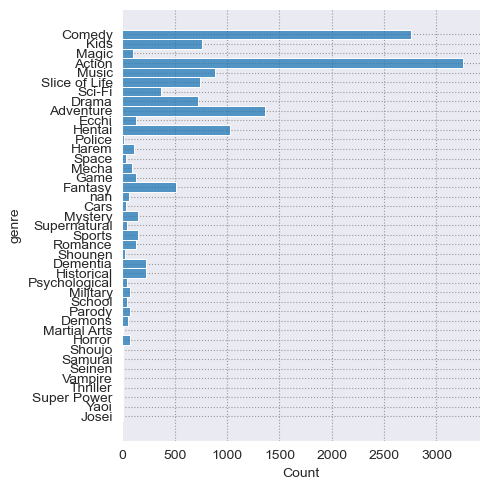

In [55]:
# Estilo de Seaborn
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# Histogramas de la informacion de los video juegos
sns.displot(data=df_anime_list_reduced, y='source')
sns.displot(data=df_anime_list_reduced, y='episodes')
sns.displot(data=df_anime_list_reduced, y='status')
sns.displot(data=df_anime_list_reduced, y='rating')
sns.displot(data=df_anime_list_reduced, y='score')
sns.displot(data=df_anime_list_reduced, y='popularity')
sns.displot(data=df_anime_list_reduced, y='genre')

In [56]:
# Haciendo mas ajustes a los datos: Agrupando por categorias para lidiar con los outliers, 
# eliminando popularity, filtrando para dejar solo los actuales que estan al aire y score mayor a uno
df_anime_list_reduced['more_12_epsiodes'] = np.where(df_anime_list_reduced['episodes'] >= 12, 'Yes', 'No')
df_anime_list_cleanned = df_anime_list_reduced[df_anime_list_reduced['score'] > 1]
df_anime_list_cleanned = df_anime_list_cleanned[df_anime_list_reduced['status'] == 'Finished Airing']
df_anime_list_cleanned = df_anime_list_cleanned.drop(['popularity','status','episodes'], axis=1)


print(df_anime_list_cleanned.shape)
df_anime_list_cleanned.head(10)

(13769, 9)


C:\Users\yoksa\AppData\Local\Temp\ipykernel_3500\3017944867.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_anime_list_cleanned = df_anime_list_cleanned[df_anime_list_reduced['status'] == 'Finished Airing']


,anime_id,title,source,duration,rating,score,producer,genre,more_12_epsiodes
0,11013,Inu x Boku SS,Manga,24 min. per ep.,PG-13 - Teens 13 or older,7.63,Aniplex,Comedy,Yes
1,2104,Seto no Hanayome,Manga,24 min. per ep.,PG-13 - Teens 13 or older,7.89,TV Tokyo,Comedy,Yes
2,5262,Shugo Chara!! Doki,Manga,24 min. per ep.,PG - Children,7.55,TV Tokyo,Comedy,Yes
3,721,Princess Tutu,Original,16 min. per ep.,PG-13 - Teens 13 or older,8.21,Memory-Tech,Comedy,Yes
4,12365,Bakuman. 3rd Season,Manga,24 min. per ep.,PG-13 - Teens 13 or older,8.67,NHK,Comedy,Yes
5,6586,Yume-iro Pâtissière,Manga,24 min. per ep.,G - All Ages,8.03,Yomiuri Telecasting,Kids,Yes
6,178,Ultra Maniac,Manga,24 min. per ep.,G - All Ages,7.26,WAO World,Magic,Yes
7,2787,Shakugan no Shana II (Second),Light novel,24 min. per ep.,PG-13 - Teens 13 or older,7.72,Geneon Universal Entertainment,Action,Yes
8,4477,Nodame Cantabile: Paris-hen,Manga,23 min. per ep.,PG-13 - Teens 13 or older,8.24,Fuji TV,Music,No
9,853,Ouran Koukou Host Club,Manga,23 min. per ep.,PG-13 - Teens 13 or older,8.34,VAP,Comedy,Yes


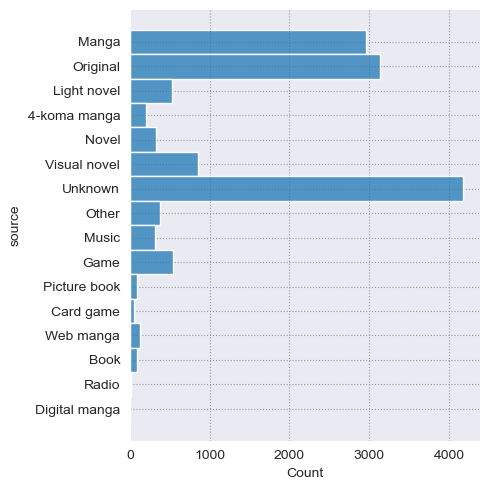

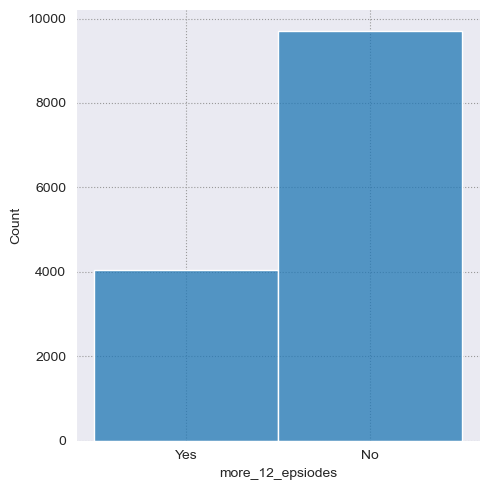

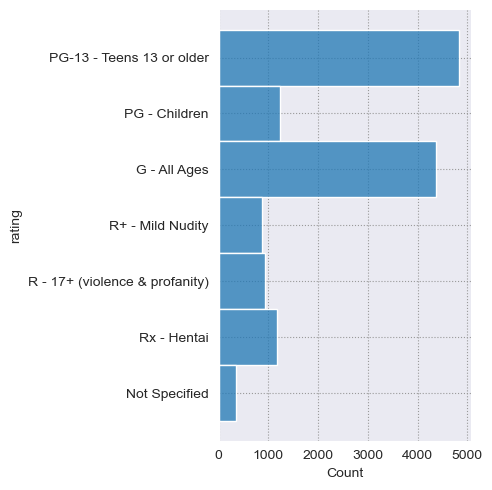

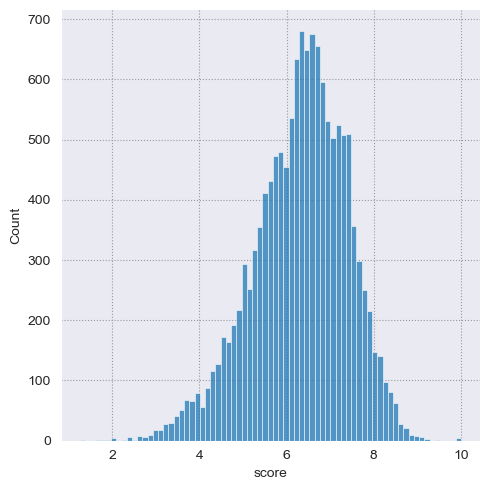

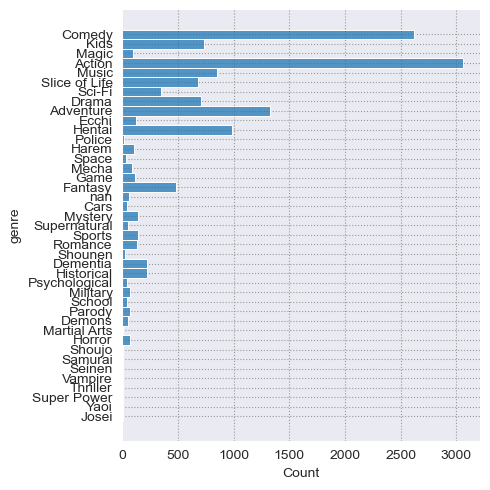

In [57]:
# Histogramas de la informacion de los video juegos
sns.displot(data=df_anime_list_cleanned, y='source')
sns.displot(data=df_anime_list_cleanned, x='more_12_epsiodes')
sns.displot(data=df_anime_list_cleanned, y='rating')
sns.displot(data=df_anime_list_cleanned, x='score')
sns.displot(data=df_anime_list_cleanned, y='genre')

Continuando por el dataset donde se relacionan los animes con los usuarios. Este es el dataset principal dado que contiene la informacion acerca de si un anime fue visto en su totalidad, o bien tiene otro estado:

In [58]:
df_anime_by_user = pd.read_csv('./datasets/animelist_filtered_by_anime.csv')
print(df_anime_by_user.shape)
print(df_anime_by_user.dtypes)
df_anime_by_user.head(10)

(14474, 11)
username                object
anime_id                 int64
my_watched_episodes      int64
my_start_date           object
my_finish_date          object
my_score                 int64
my_status                int64
my_rewatching          float64
my_rewatching_ep         int64
my_last_updated          int64
my_tags                 object
dtype: object


,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,1362923691,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,1367081015,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,1362308037,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,1364399953,NaN
5,karthiga,210,161,0000-00-00,0000-00-00,7,2,NaN,0,1362923826,NaN
6,karthiga,232,70,0000-00-00,0000-00-00,6,2,NaN,0,1362849882,NaN
7,karthiga,233,78,0000-00-00,0000-00-00,6,2,NaN,0,1362893384,NaN
8,karthiga,249,167,0000-00-00,0000-00-00,8,2,NaN,0,1363709086,NaN
9,karthiga,269,366,0000-00-00,0000-00-00,10,2,NaN,0,1362303563,NaN


Los datos importantes de este dataset son el username, anime_id, my_watched_episodes, my_score y my_status. El resto de la informacion no agrega valor

In [59]:
df_anime_by_user_reduced = df_anime_by_user.drop(['my_start_date', 'my_finish_date', 'my_rewatching', 'my_rewatching_ep', 'my_last_updated', 'my_tags'], axis=1)
print(df_anime_by_user_reduced.shape)
print(df_anime_by_user_reduced.dtypes)
df_anime_by_user_reduced.head(10)

(14474, 5)
username               object
anime_id                int64
my_watched_episodes     int64
my_score                int64
my_status               int64
dtype: object


,username,anime_id,my_watched_episodes,my_score,my_status
0,karthiga,21,586,9,1
1,karthiga,59,26,7,2
2,karthiga,74,26,7,2
3,karthiga,120,26,7,2
4,karthiga,178,26,7,2
5,karthiga,210,161,7,2
6,karthiga,232,70,6,2
7,karthiga,233,78,6,2
8,karthiga,249,167,8,2
9,karthiga,269,366,10,2


In [64]:
nan_counts = df_anime_by_user_reduced.isna().sum()
print(f"Number of NaN values per column:\n{nan_counts}")

Number of NaN values per column:
username               0
anime_id               0
my_watched_episodes    0
my_score               0
my_status              0
completed              0
dtype: int64


### Analisis estadistico del dataframe

Los status son los siguientes:
1: watching
2: completed
3: on hold
4: dropped
6: plan to watch

La distribucion de ese status es la siguiente:

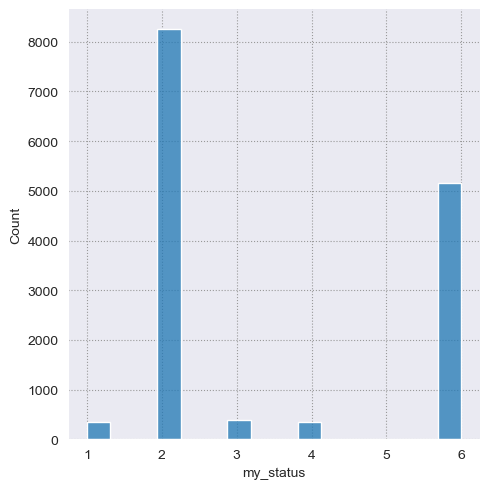

In [60]:
sns.displot(data=df_anime_by_user_reduced, x='my_status')

In [61]:
# Agrupando todos los que no son de estado completado
df_anime_by_user_reduced['completed'] = np.where(df_anime_by_user_reduced['my_status'] == 2, 'Yes', 'No')
print(df_anime_by_user_reduced.shape)
print(df_anime_by_user_reduced.dtypes)
df_anime_by_user_reduced.head(10)

(14474, 6)
username               object
anime_id                int64
my_watched_episodes     int64
my_score                int64
my_status               int64
completed              object
dtype: object


,username,anime_id,my_watched_episodes,my_score,my_status,completed
0,karthiga,21,586,9,1,No
1,karthiga,59,26,7,2,Yes
2,karthiga,74,26,7,2,Yes
3,karthiga,120,26,7,2,Yes
4,karthiga,178,26,7,2,Yes
5,karthiga,210,161,7,2,Yes
6,karthiga,232,70,6,2,Yes
7,karthiga,233,78,6,2,Yes
8,karthiga,249,167,8,2,Yes
9,karthiga,269,366,10,2,Yes


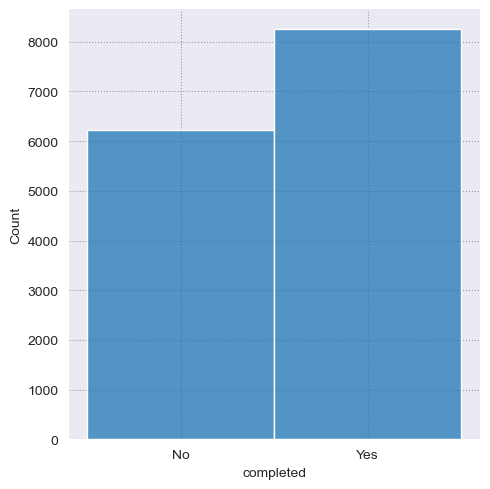

In [62]:
sns.displot(data=df_anime_by_user_reduced, x='completed')

Y finalmente, analizando el dataset que contiene la informacion de los usuarios. Esta informacion demografica es importante para poder detectar si hay senales que indiquen que la probabilidad de exito sea mayor.

In [63]:
df_user_info = pd.read_csv('./datasets/users_filtered.csv')
print(df_user_info.shape)
print(df_user_info.dtypes)
df_user_info.head(10)

(116133, 17)
username                     object
user_id                       int64
user_watching                 int64
user_completed                int64
user_onhold                   int64
user_dropped                  int64
user_plantowatch              int64
user_days_spent_watching    float64
gender                       object
location                     object
birth_date                   object
access_rank                 float64
join_date                    object
last_online                  object
stats_mean_score            float64
stats_rewatched             float64
stats_episodes              float64
dtype: object


,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,NaN,2010-05-10,2012-10-18 19:06:00,9.70,6.0,920.0
5,Bas_G,5015094,35,114,6,20,175,30.81,Male,"Nijmegen, Nederland",1999-10-24,NaN,2015-11-26,1900-05-10 13:53:00,7.86,0.0,1847.0
6,HimeAria,3129315,2,87,2,0,28,20.12,Female,Poland,1996-09-26,NaN,2013-09-08,1900-04-27 10:52:00,8.23,0.0,1314.0
7,Skallington,326733,0,3,0,0,0,4.32,Male,Norberg Sweden,1991-03-15,NaN,2010-05-09,2010-05-12 06:29:00,10.00,7.0,251.0
8,Slimak,61677,79,224,0,3,84,126.17,Male,Poland,1988-02-21,NaN,2008-05-18,1900-05-01 05:04:00,7.77,2.0,7472.0
9,Elysiun,5927342,7,4,0,0,4,2.09,Male,Nebraska,1984-11-16,NaN,2016-12-25,2017-03-11 21:37:00,7.40,0.0,121.0
